## Import libraries

In [1]:
print("load libraries")
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# https://stackoverflow.com/a/34306306/4126114
np.random.seed(0)

load libraries


## Generate data

X [[ 0.17640523 -0.04837975  3.00395099  2.16057371 -0.10517378  0.        ]
 [ 0.13984914  0.32847254  3.03383776  1.89052903  0.21265031  0.        ]
 [ 0.29654313  0.38435079  2.91578168  2.12583722  0.27954611  0.        ]
 [ 0.51960953  0.57123257  2.99503677  2.14580907  0.68264116  0.        ]
 [ 0.57617414  0.74538793  2.87697546  1.97077968  0.60628914  0.        ]
 [ 0.38169775  0.91970676  2.90112073  2.06723926  1.01889409  0.        ]
 [ 0.65965132  1.06804433  3.06020746  2.09316863  0.98003401  0.        ]
 [ 0.62908197  1.22078298  2.98404514  2.10442932  0.83640144  0.        ]
 [ 0.70703421  1.56743515  2.8716652   2.00828541  0.93021428  0.        ]
 [ 0.82438676  1.52178427  2.87617799  1.94159486  0.87491239  0.        ]]


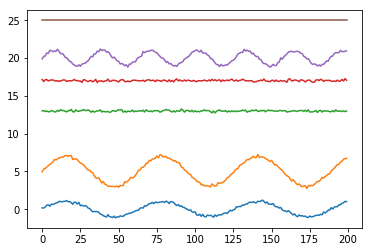

In [2]:
N=100000
X = np.zeros(shape=(N,6))
# X[:,0] = 2*np.ones(shape=(N,))
# X[:,1] = 3*np.ones(shape=(N,))
# X[:,2] = 4*np.ones(shape=(N,))
sigma = 0.1
xt=np.arange(0,N/10,1/10)
X[:,0] = 1*np.sin(1*xt) + np.random.normal(0, sigma, N) # first sine wave
X[:,1] = 2*np.sin(1*xt) + np.random.normal(0, sigma, N) # close duplicate of col above
X[:,2] = np.random.normal(3, sigma, N) # first flat
X[:,3] = np.random.normal(2, sigma, N) # close duplicate of col above
X[:,4] = np.sin(2*xt) + np.random.normal(0, sigma, N) # second sine wave of new frequency

# Case 1: keep col 5 at 0
# Performances in descending order:
# - PCA with dimensionality reduction
# - AE with PCA (after dimensionality reduction)
#    - Note: even just dropping the col5=0 makes a difference
# - AE with PCA without dimensionality reduction
# - AE without PCA
#
# Case 2: make col 5 a combination of 0 and 4
# X[:,5] = X[:,0]+X[:,4] # linear combination of sine waves above

print('X',X[0:10,:])

from utils import myPlot
myPlot(X)

## Normalize

Using TensorFlow backend.


X normalized [[ 0.57256629  0.48237672  0.50144069  0.68264278  0.45789738  0.        ]
 [ 0.55996018  0.56194547  0.5381266   0.3728326   0.57438926  0.        ]
 [ 0.61399499  0.57374362  0.39321318  0.64279116  0.59890853  0.        ]
 [ 0.69091786  0.61320192  0.49049852  0.66570397  0.74665473  0.        ]
 [ 0.71042376  0.64997315  0.34557868  0.46490058  0.71866947  0.        ]
 [ 0.64335996  0.6867789   0.37521691  0.57556434  0.86990132  0.        ]
 [ 0.73921027  0.71809896  0.57049531  0.60531194  0.85565796  0.        ]
 [ 0.72866865  0.75034826  0.47700633  0.61823083  0.8030124   0.        ]
 [ 0.75554993  0.82354054  0.33906036  0.50792923  0.83739756  0.        ]
 [ 0.79601813  0.81390179  0.34459979  0.43141814  0.81712779  0.        ]]


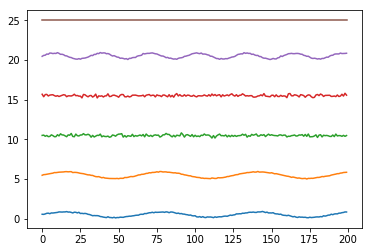

In [3]:
from utils import myNorm3

X_norm = myNorm3(X)
print("X normalized",X_norm[0:10,:])

# plot
myPlot(X_norm)

## AE without PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 1s - loss: 0.0708 - val_loss: 0.0586
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0476 - val_loss: 0.0381
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0319 - val_loss: 0.0271
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0241 - val_loss: 0.0214
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0192 - val_loss: 0.0173
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0157 - val_loss: 0.0144
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0133 - val_loss: 0.0125
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0117 - val_loss: 0.0110
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0102 - val_loss: 0.0096
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0089 - val_

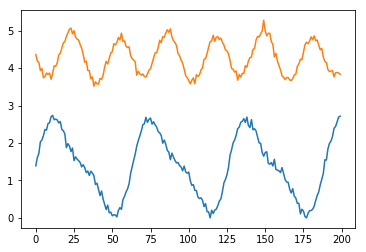

In [4]:
# split
X_train, X_test = train_test_split(X_norm, train_size=0.8, random_state=8888)

from utils import buildNetwork

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_norm.shape[1])
N_epochs = 25
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_norm)

# plot
myPlot(X_enc)

## PCA without dim reduction

PCA
X_pca_2 [[  3.47580068e-02  -1.05452392e-01   1.47445840e-01  -1.77914247e-01
   -6.68459388e-02  -0.00000000e+00]
 [  3.55290320e-01   2.12449074e-01  -1.52054485e-02   1.14663446e-01
   -1.86376387e-02  -0.00000000e+00]
 [  4.75305046e-01   2.79443409e-01   2.04711924e-02  -1.68582085e-01
   -5.12717941e-02  -0.00000000e+00]
 [  7.42102929e-01   6.82685787e-01   1.53062298e-01  -1.76826728e-01
   -1.00418395e-01  -0.00000000e+00]
 [  9.23185182e-01   6.06405093e-01  -1.23434598e-03  -7.66492333e-02
   -2.07565596e-01  -0.00000000e+00]
 [  9.91827410e-01   1.01897670e+00  -9.92295048e-02  -8.57310222e-02
    4.48740884e-02   0.00000000e+00]
 [  1.24894143e+00   9.80274128e-01   1.34827457e-01  -7.79884002e-02
   -2.07393636e-02  -0.00000000e+00]
 [  1.37188620e+00   8.36674609e-01   2.42628976e-02  -9.98096849e-02
    2.80916588e-02  -0.00000000e+00]
 [  1.71670878e+00   9.30619377e-01  -1.37468996e-01  -4.98265800e-02
    4.97718440e-03  -0.00000000e+00]
 [  1.72844835e+00   8.75

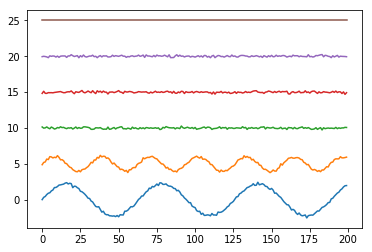

In [5]:
print("PCA")
encoding_dim_pca = X.shape[1] # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_2 = pca.fit_transform(X)
print("X_pca_2",X_pca_2[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_2)

## PCA with dimensionality reduction

PCA MLE
X_pca_1 [[ 0.03475801 -0.10545239]
 [ 0.35529032  0.21244907]
 [ 0.47530505  0.27944341]
 [ 0.74210293  0.68268579]
 [ 0.92318518  0.60640509]
 [ 0.99182741  1.0189767 ]
 [ 1.24894143  0.98027413]
 [ 1.3718862   0.83667461]
 [ 1.71670878  0.93061938]
 [ 1.72844835  0.87535311]]
Explained variance ratio (cumsum) [ 0.82282519  0.99018327]


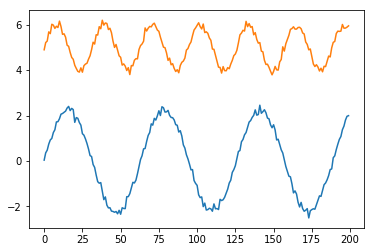

In [6]:
print("PCA MLE")
encoding_dim_pca = 2 # 'mle'
pca = PCA(n_components=encoding_dim_pca, random_state=888, svd_solver = 'full')
X_pca_1 = pca.fit_transform(X)
print("X_pca_1",X_pca_1[0:10,:])

print("Explained variance ratio (cumsum)", np.cumsum(pca.explained_variance_ratio_))

# plot
myPlot(X_pca_1)

## Normalize PCA output

Use the one with dimensionality reduction, otherwise worse results

To test using the one without dimensionality reduction,
replace `X_pca_use = X_pca_1` with `X_pca_use = X_pca_2`

X_pca_use normalized [[ 0.50271812  0.45813409]
 [ 0.5648972   0.57464832]
 [ 0.58817849  0.59920246]
 [ 0.6399338   0.74699504]
 [ 0.67506139  0.71903736]
 [ 0.68837709  0.8702492 ]
 [ 0.73825385  0.8560643 ]
 [ 0.76210353  0.80343357]
 [ 0.82899461  0.83786531]
 [ 0.83127193  0.81760965]]


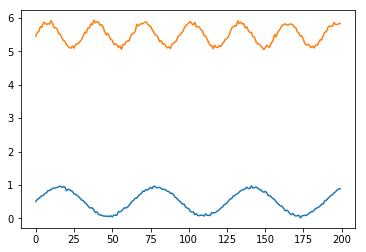

In [7]:
# choose the PCA with the dimensionality reduction
X_pca_use = X_pca_1
X_pca_use = myNorm3(X_pca_use)
print("X_pca_use normalized",X_pca_use[0:10,:])
myPlot(X_pca_use)

## AE with PCA

autoencoder
Train on 80000 samples, validate on 20000 samples
Epoch 1/25
80000/80000 [==============================] - 2s - loss: 0.0827 - val_loss: 0.0722
Epoch 2/25
80000/80000 [==============================] - 1s - loss: 0.0621 - val_loss: 0.0531
Epoch 3/25
80000/80000 [==============================] - 1s - loss: 0.0448 - val_loss: 0.0372
Epoch 4/25
80000/80000 [==============================] - 1s - loss: 0.0291 - val_loss: 0.0210
Epoch 5/25
80000/80000 [==============================] - 1s - loss: 0.0143 - val_loss: 0.0088
Epoch 6/25
80000/80000 [==============================] - 1s - loss: 0.0055 - val_loss: 0.0035
Epoch 7/25
80000/80000 [==============================] - 1s - loss: 0.0030 - val_loss: 0.0027
Epoch 8/25
80000/80000 [==============================] - 1s - loss: 0.0025 - val_loss: 0.0023
Epoch 9/25
80000/80000 [==============================] - 1s - loss: 0.0021 - val_loss: 0.0018
Epoch 10/25
80000/80000 [==============================] - 1s - loss: 0.0015 - val_

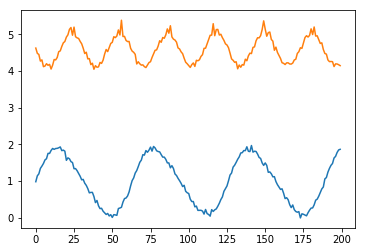

In [8]:
# Use the PCA with dimensionality reduction
# If using the one without dimensionality reduction, result won't be as good
# split
X_train, X_test = train_test_split(X_pca_use, train_size=0.8, random_state=8888)

# train autoencoder
print("autoencoder")
autoencoder, encoder = buildNetwork(X_pca_use.shape[1])
autoencoder.fit(
  X_train,
  X_train,
  epochs=N_epochs, #50,
  batch_size=256,
  shuffle=True,
  validation_data=(
    X_test,
    X_test,
  )
)

print("encoder predict")
X_enc = encoder.predict(X_pca_use)
# print("encoded",X_enc)
# # X_enc_dec = decoder.predict(X_enc)
# # print("enc-dec",X_enc_dec)
# X_rec = autoencoder.predict(X_pca)
# print("recoded",X_rec)

# plot
# from matplotlib import pyplot as plt
myPlot(X_enc)